In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz, iirdesign, group_delay

In [52]:
# frecuencia de muestreo
fs = 100
# Nyquist rate
fnyq = fs / 2.0
# Frecuencia de corte
fc = 10.0 / fnyq
# Ancho de la transicion
width = 5.0 / fnyq
# Atenuacion de la banda de paso, en dB
ripple_sb = 60.0
# Apartamiento máximo en la banda de paso
ripple_pb = 0.005

In [53]:
# Ventana kaiser, orden N, parametro beta
N, beta = kaiserord(ripple_sb, width)
# Uso firwin para crear LP con ventana de kaiser
taps = firwin(N, fc, window=('kaiser', beta))

### Filtro Ventana Kaiser

(-2, 80)

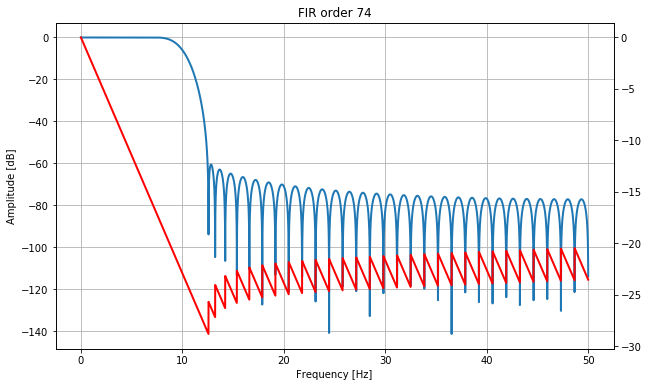

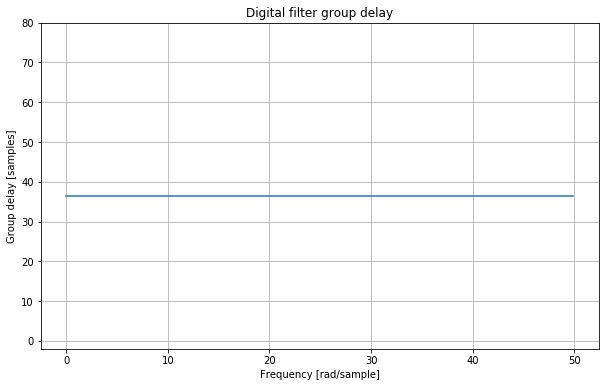

In [51]:
fig,ax = plt.subplots(figsize = (10,6))
w, hfir = freqz(taps, worN=8000)

ax.plot((w/np.pi)*fnyq, 20*np.log10(np.abs(hfir)), linewidth=2)
ax.set_title('FIR order {}'.format(taps.size))
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.grid()
#Dibujamos la fase
ax2 = ax.twinx()
angles = np.unwrap(np.angle(hfir))
ax2.plot((w/np.pi)*fnyq, angles , linewidth=2, color = 'red')


#Retardo de grupo 
w,gd = group_delay((taps,1.))
fig,ax = plt.subplots(figsize = (10,6))
ax.set_title('Digital filter group delay')
ax.plot(((w/np.pi)*fnyq), gd)
ax.set_ylabel('Group delay [samples]')
ax.set_xlabel('Frequency [rad/sample]')
ax.grid()
#axes.set_xlim([xmin,xmax])
ax.set_ylim([-2,80])



### Filtro IIR

(-2, 80)

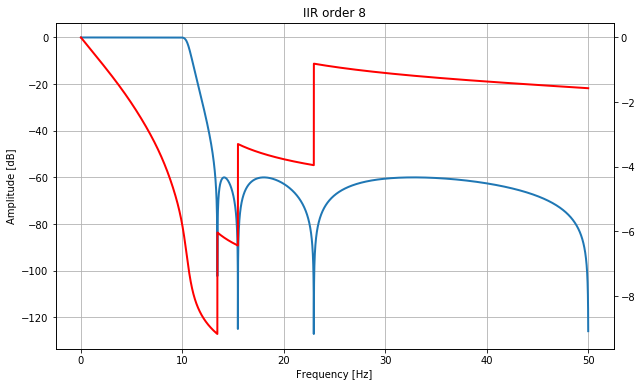

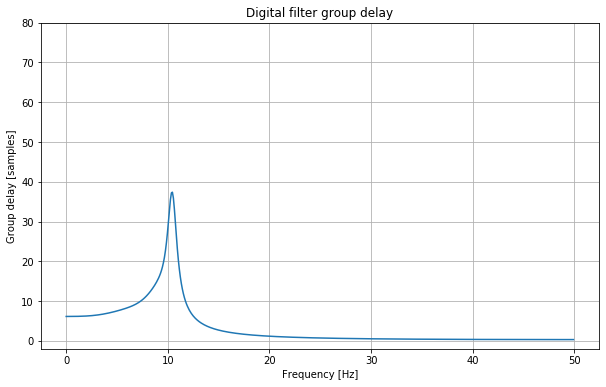

In [49]:
### IIR
 
Wp = fc          # frecuencia de corte
Ws = fc + width  # frecuencia de stopband
Rp = -20*np.log10(1 - ripple_pb) # passband maximum loss (gpass)
As = ripple_sb   # stopband min attenuation (gstop)

b,a = iirdesign(Wp, Ws, Rp, As, ftype='ellip')

w, hiir = freqz(b,a, worN=8000)

#Dibujamos la 
fig,ax = plt.subplots(figsize = (10,6))
ax.plot((w/np.pi)*fnyq, 20*np.log10(np.abs(hiir)), linewidth=2)
ax.set_title('IIR order {}'.format(a.size))
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.grid(which='both', axis='both')
#Dibujamos la fase.
ax2 = ax.twinx()
angles = np.unwrap(np.angle(hiir))
ax2.plot((w/np.pi)*fnyq, angles , linewidth=2, color = 'red')


#Retardo de grupo 
w,gd = group_delay((b,a))
fig,ax = plt.subplots(figsize = (10,6))
ax.set_title('Digital filter group delay')
ax.plot((w/np.pi)*fnyq, gd)
ax.set_ylabel('Group delay [samples]')
ax.set_xlabel('Frequency [Hz]')
ax.grid()
